### 9.1.1 VALOR PRESENTE

In [2]:
def vp(vf, r, n):
    x = vf/(1+r)**n
    return(x)

valor = vp(100,0.1,1)
print("Valor presente: ", valor)

Valor presente:  90.9090909090909


### 9.1.2 VALOR PRESENTE LÍQUIDO (VPL)

In [5]:
# CÁLCULO DO VPL
# a função npv não faz mais parte do Numpy, desde a versão 1.20, sendo uma biblioteca a parte (numpy_financial)
import numpy as np
import numpy_financial as npf

vinicial = -155000
esaida = 70000 - 15000

FC = np.array([vinicial, esaida, esaida, esaida, esaida, esaida, esaida])

investimento = npf.npv(rate=0.17, values=FC)

print('VPL = ', investimento)

VPL =  42405.161495817825


In [6]:
# CÁLCULO DO VPL - FC não constante
import numpy as np
import numpy_financial as npf

vinicial = -155000
esaida = np.zeros(6)
esaida[0] = 70000 - 15000
esaida[1] = 70000 - 25000
esaida[2] = 70000 - 35000
esaida[3] = 70000 - 15000
esaida[4] = 70000 - 25000
esaida[5] = 70000 - 10000

FC = np.array([vinicial, esaida[0], esaida[1], esaida[2],esaida[3],esaida[4],esaida[5]])

investimento = npf.npv(rate=0.17, values=FC)

print('VPL = ', investimento)

VPL =  20000.69629223886


In [8]:
# CÁLCULO DO VPL - FC não constante
import numpy as np
import numpy_financial as npf

FC = np.zeros(7)

FC[0] = -155000

for i in range(6):
    FC[i+1] = 70000-15000
    
investimento = npf.npv(rate=0.17, values=FC)

print('VPL = ', investimento)

VPL =  42405.161495817825


### 9.1.3 TAXA INTERNA DE RETORNO (TIR)

In [11]:
# CÁLCULO DA TIRL - TAXA INTERNA DE RETORNO
import numpy as np
import numpy_financial as npf

FC = np.zeros(7)

FC[0] = -155000

for i in range(6):
    FC[i+1] = 70000-15000
    
tir = npf.irr(FC)

print("TIR = "+ str(round(100*tir,2)) + " %")

TIR = 27.04 %


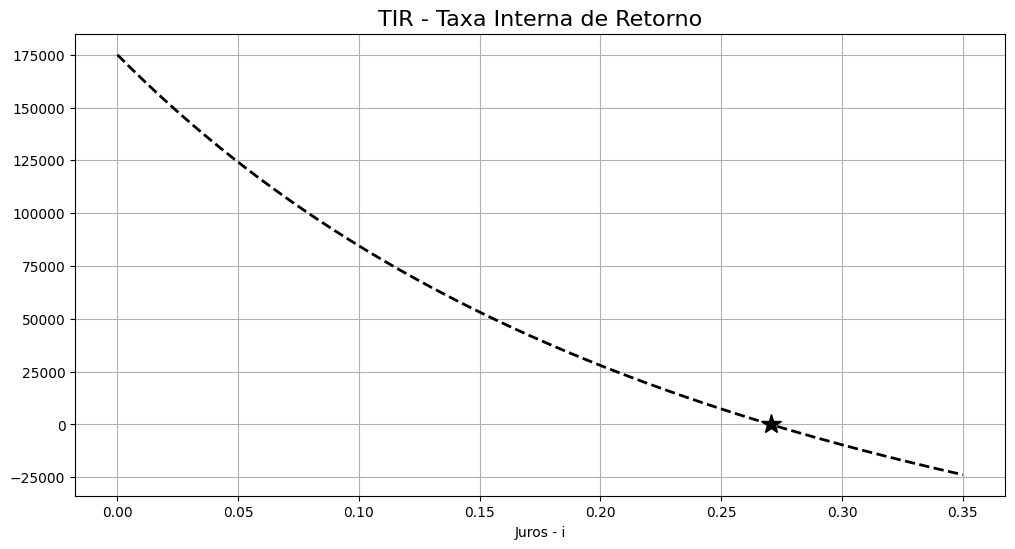

In [12]:
import matplotlib.pyplot as plt

eixox = np.linspace(0,0.35,200)
vpl = np.array([npf.npv(i,FC) for i in eixox])

plt.figure(figsize=(12,6))
plt.plot(eixox, vpl, '--k', linewidth=2)
plt.plot(tir, 0, 'k*', markersize=15)
plt.xlabel('Juros - i')
plt.title("TIR - Taxa Interna de Retorno", fontsize=16)
plt.grid()

### 9.2 RELAÇÃO RISCO *VERSUS* RETORNO EM CARTEIRAS DE INVESTIMENTO

In [5]:
import numpy as np
import numpy_financial as npf
import pandas as pd

ativo = ['A','B','C']
n = len(ativo)

A = np.array([4,5,6,5,5,6,7,8,4,3,5])
B = np.array([1,5,10,4,11,7,8,3,1,5,7])
C = np.array([3,4,3,4,5,6,5,3,5,3,4])

df = pd.DataFrame([A,B,C], index=ativo)
prec = df.T # transposta para colocar os dados em colunas

ri = prec/prec.shift(1)-1
mi = ri.mean() # retorno médio dos ativos por colunas
sigma = ri.cov() # covariância da carteira

print("Imprimir ri")
print(ri)
print("")
print("Retorno médio dos ativos por carteira (mi)")
print(mi)
print("")
print("Matriz de covariância da carteira (sigma)")
print(sigma)

Imprimir ri
           A         B         C
0        NaN       NaN       NaN
1   0.250000  4.000000  0.333333
2   0.200000  1.000000 -0.250000
3  -0.166667 -0.600000  0.333333
4   0.000000  1.750000  0.250000
5   0.200000 -0.363636  0.200000
6   0.166667  0.142857 -0.166667
7   0.142857 -0.625000 -0.400000
8  -0.500000 -0.666667  0.666667
9  -0.250000  4.000000 -0.400000
10  0.666667  0.400000  0.333333

Retorno médio dos ativos por carteira (mi)
A    0.070952
B    0.903755
C    0.090000
dtype: float64

Matriz de covariância da carteira (sigma)
          A         B         C
A  0.102785  0.013396 -0.015790
B  0.013396  3.266941 -0.138910
C -0.015790 -0.138910  0.134395


Neste caso, interpreta-se, por exemplo, qu o ativo A tem volatilidade de 10% no período e uma correlação positiva de 1.3% com o ativo *B* e correlação negativa de -1.5% com o ativo *C* (representados pela primeira linha da matriz)

In [7]:
w = np.array([0.6,0.3,0.1]) # pesos da alocação dos investimentos

# retorno e risco da carteira
retorno = np.sum(w*mi)
risco = np.sqrt(np.dot(w.T, np.dot(sigma,w)))

print("Retorno esperado da carteira: ", str(round(100*retorno,2))+ " %")
print("Risco da carteira: ", str(round(100*risco,2)) + " %")

Retorno esperado da carteira:  32.27 %
Risco da carteira:  57.18 %


Text(0, 0.5, 'RETORNO ESPERADO')

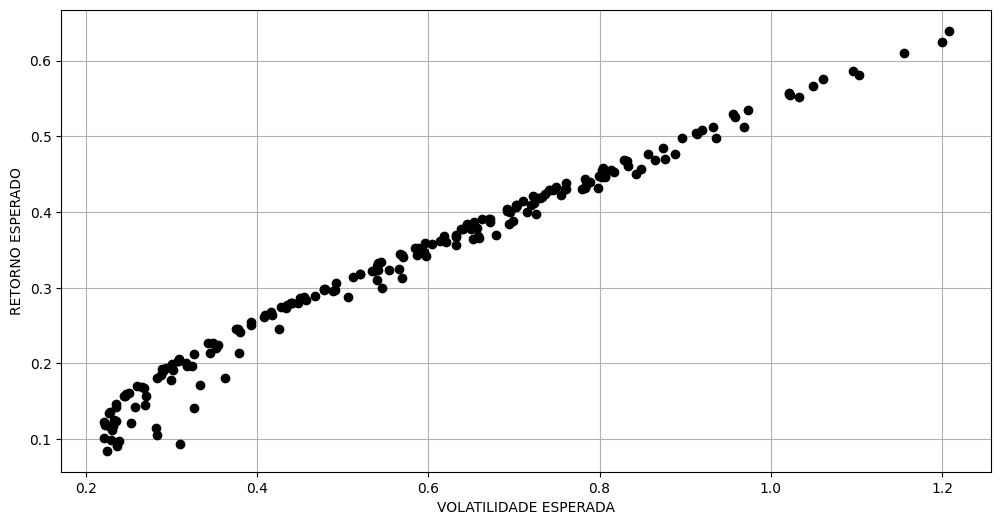

In [9]:
vet_R = []
vet_Vol = []

for i in range(200):
    # peso da alocação do investimento
    w2 = np.random.random(3)
    w2 = w2/np.sum(w2)
    #retorno e risco da carteira
    retorno = np.sum(w2*mi)
    risco = np.sqrt(np.dot(w2.T,np.dot(sigma,w2)))
    #
    vet_R.append(retorno)
    vet_Vol.append(risco)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(vet_Vol, vet_R,'ok')
plt.grid()
plt.xlabel('VOLATILIDADE ESPERADA')
plt.ylabel('RETORNO ESPERADO')

### EXEMPLO 9.1

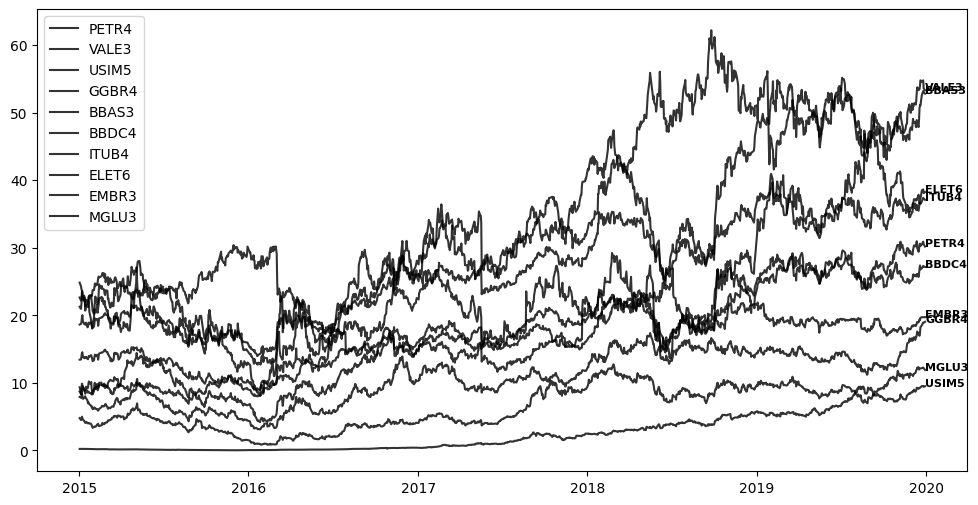

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados/Portfolio.xlsx", sheet_name="Planilha1")

list = ['PETR4','VALE3','USIM5','GGBR4','BBAS3','BBDC4','ITUB4','ELET6','EMBR3','MGLU3']

plt.figure(figsize=(12,6))
ax1 = plt.subplot(111)
ax1.plot(df.Date, df[list],'-k',alpha=0.8)
ax1.legend(list)

for i in range(10):
    ax1.text(x=df.Date[-1:],y=df[list[i]][-1:],
            s=list[i],fontsize=8,color='k',weight='bold')
    
n=len(df)

Covariância da carteira:            PETR4     VALE3     USIM5     GGBR4     BBAS3     BBDC4     ITUB4  \
PETR4  0.248541  0.103479  0.143195  0.109256  0.137407  0.098017  0.086442   
VALE3  0.103479  0.238906  0.137605  0.137492  0.064988  0.053322  0.044956   
USIM5  0.143195  0.137605  0.398572  0.187824  0.125974  0.090899  0.076007   
GGBR4  0.109256  0.137492  0.187824  0.230595  0.090452  0.073062  0.060644   
BBAS3  0.137407  0.064988  0.125974  0.090452  0.191117  0.108817  0.097730   
BBDC4  0.098017  0.053322  0.090899  0.073062  0.108817  0.110489  0.085149   
ITUB4  0.086442  0.044956  0.076007  0.060644  0.097730  0.085149  0.089294   
ELET6  0.098445  0.037170  0.098181  0.068264  0.103152  0.072259  0.064742   
EMBR3  0.020923  0.031769  0.011871  0.025984  0.013492  0.013924  0.016413   
MGLU3  0.076967  0.058321  0.099784  0.071054  0.091107  0.060877  0.053187   

          ELET6     EMBR3     MGLU3  
PETR4  0.098445  0.020923  0.076967  
VALE3  0.037170  0.031769  0

Text(0.5, 1.0, 'Retorno esperado x Volatilidade esperada ativos da Bovespa')

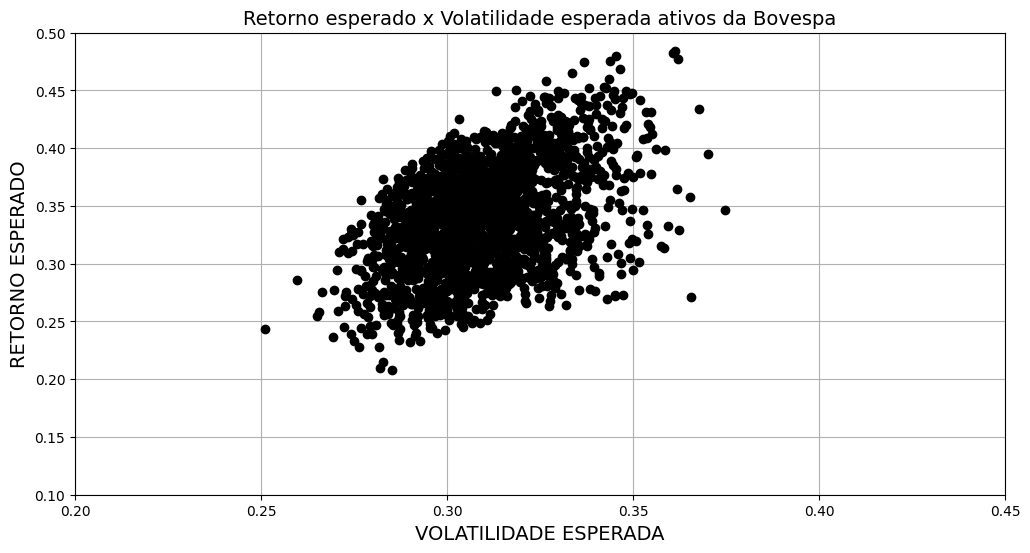

In [20]:
#exclui a coluna de datas para cálculo do retorno
prec = df.drop(['Date'], axis=1)
#retorno dos preços
ri = prec/prec.shift(1)-1
mi = ri.mean().values*252 #retorno médio dos ativos por colunas
sigma = ri.cov()*252 # covariância da carteira
print("Covariância da carteira: ", sigma)

vet_R = []
vet_Vol = []

for i in range(2000):
    # peso da alocação do investimento
    w = np.random.random(len(list))
    w = w/np.sum(w)
    #retorno e risco da carteira
    retorno = np.sum(w*mi)
    risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    #
    vet_R.append(retorno)
    vet_Vol.append(risco)
    
plt.figure(figsize=(12,6))
ax2 = plt.subplot(111)
ax2.plot(vet_Vol, vet_R,'ok')
ax2.set_xlim(0.2, 0.45)
ax2.set_ylim(0.1, 0.5)
ax2.grid()
ax2.set_xlabel('VOLATILIDADE ESPERADA',fontsize=14)
ax2.set_ylabel('RETORNO ESPERADO',fontsize=14)
plt.title("Retorno esperado x Volatilidade esperada ativos da Bovespa", fontsize=14)

### EXEMPLO 9.2

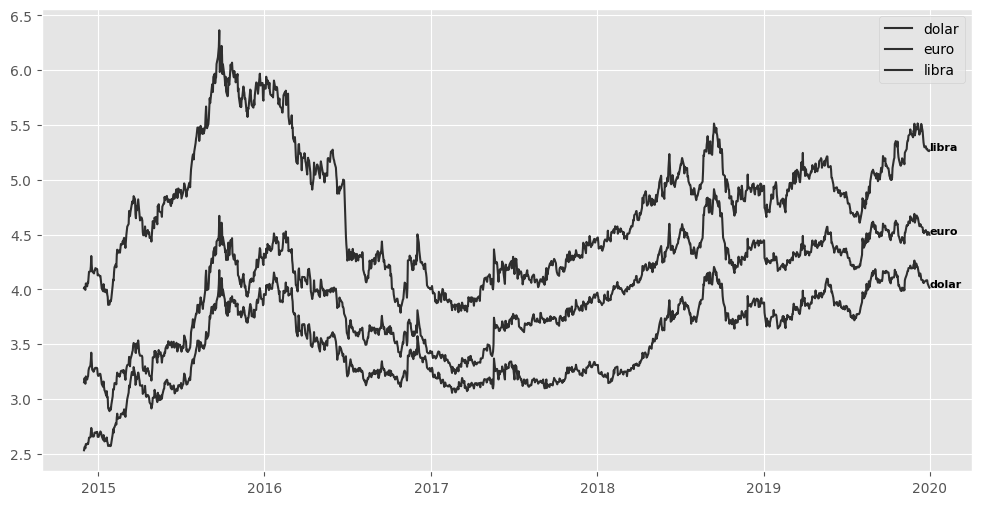

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados/Moedas.xlsx", sheet_name="Planilha1")

list = ['dolar','euro','libra']

plt.style.use('ggplot')
plt.figure(figsize=(12,6))

ax1 = plt.subplot(111)
ax1.plot(df.Date, df[list],'-k',alpha=0.8)
ax1.legend(list)

for i in range(3):
    ax1.text(x=df.Date[-1:],y=df[list[i]][-1:],
            s=list[i],fontsize=8,color='k',weight='bold')
    
n=len(df)

Covariância da carteira:            dolar      euro     libra
dolar  0.030966  0.024967  0.027147
euro   0.024967  0.029234  0.025684
libra  0.027147  0.025684  0.033861


Text(0.5, 1.0, 'Retorno esperado x Volatilidade esperada ativos - MOEDAS')

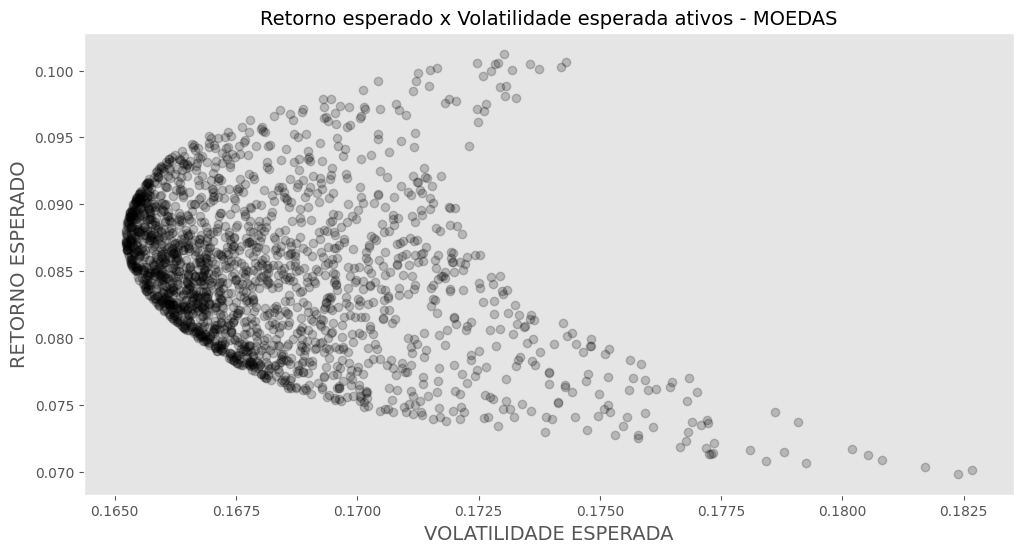

In [8]:
#exclui a coluna de datas para cálculo do retorno
prec = df.drop(['Date'], axis=1)
#retorno dos preços
ri = prec/prec.shift(1)-1
mi = ri.mean().values*252 #retorno médio dos ativos por colunas
sigma = ri.cov()*252 # covariância da carteira
print("Covariância da carteira: ", sigma)

vet_R = []
vet_Vol = []

for i in range(2000):
    # peso da alocação do investimento
    w = np.random.random(len(list))
    w = w/np.sum(w)
    #retorno e risco da carteira
    retorno = np.sum(w*mi)
    risco = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    #
    vet_R.append(retorno)
    vet_Vol.append(risco)
    
plt.figure(figsize=(12,6))
ax2 = plt.subplot(111)
ax2.plot(vet_Vol, vet_R,'ok', alpha=0.2)
#ax2.set_xlim(0.2, 0.45)
#ax2.set_ylim(0.1, 0.5)
ax2.grid()
ax2.set_xlabel('VOLATILIDADE ESPERADA',fontsize=14)
ax2.set_ylabel('RETORNO ESPERADO',fontsize=14)
plt.title("Retorno esperado x Volatilidade esperada ativos - MOEDAS", fontsize=14)

Pesos ótimos:  [0.258 0.541 0.201]
Retorno ótimo esperado:  8.761 %
Volatilidade ótima esperada:  16.523 %


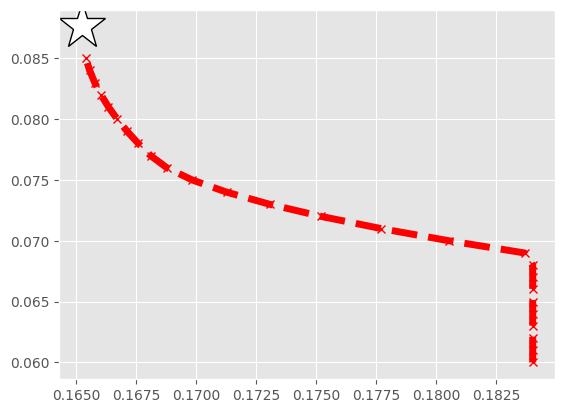

In [10]:
import scipy.optimize as solver
def f_obj(peso):
    return np.sqrt(np.dot(peso.T, np.dot(sigma,peso)))

x0 = np.array([1.0 / (len(list)) for x in range(len(list))])

bounds = tuple((0,1) for x in range(len(list)))

faixa_ret = np.arange(0.06, 0.085, .001)

risk = []

for i in faixa_ret:
    constraints = [{'type':'eq', 'fun':lambda x: np.sum(x) - 1},
                  {'type':'eq', 'fun':lambda x: np.sum(x * mi) - i}]
    outcome = solver.minimize(f_obj, x0, constraints=constraints, bounds = bounds, method='SLSQP')
    risk.append(outcome.fun)

plt.plot(risk, faixa_ret,'r--x',linewidth=5)

print('Pesos ótimos: ', outcome['x'].round(3))

def estatistica_port(peso):
    peso = np.array(peso)
    ret_ot = np.sum(peso*mi)
    risco_ot = np.sqrt(np.dot(peso.T,np.dot(sigma, peso)))
    return np.array([ret_ot, risco_ot])

for i in faixa_ret:
    constraints = [{'type':'eq', 'fun':lambda x: sum(x) - 1}]
    outcome = solver.minimize(f_obj, x0, constraints = constraints, bounds = bounds, method='SLSQP')
    risk.append(outcome.fun)
    
ret_ot, vol_ot = estatistica_port(outcome['x'])
print('Retorno ótimo esperado: ', str((ret_ot*100).round(3))+' %')
print('Volatilidade ótima esperada: ', str((vol_ot*100).round(3)) + ' %')
plt.plot(vol_ot, ret_ot, '*',markersize=35, markerfacecolor='w', markeredgecolor='black')

### 9.4 VALOR EM RISCO (VALUE AT RISK)

Fechamento    0.027539
dtype: float64


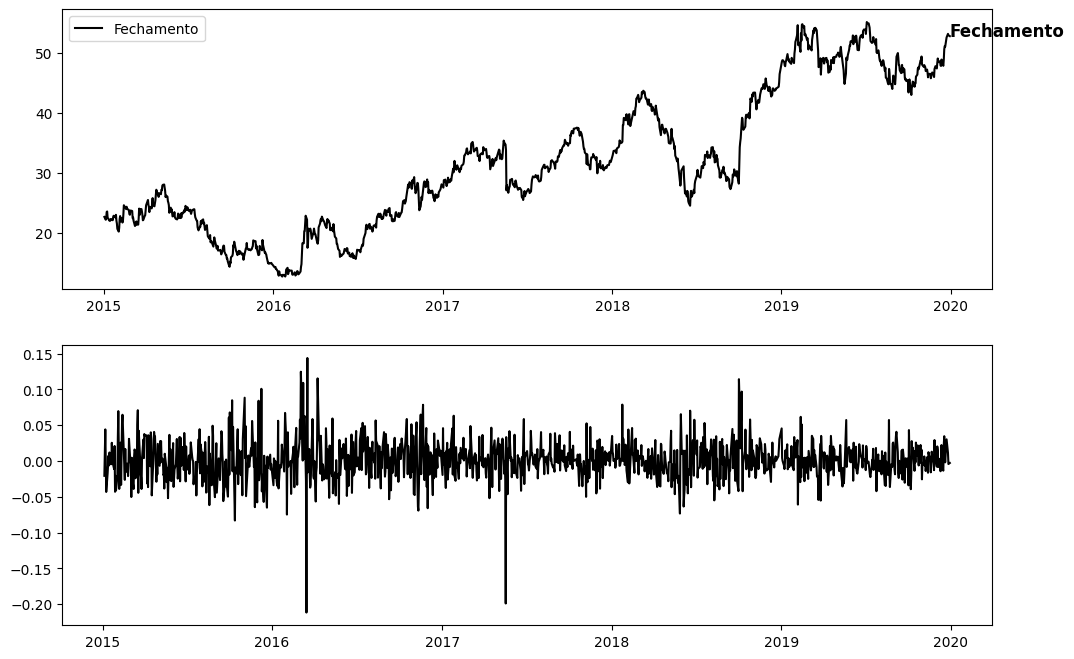

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import math as mt

df_dados = pd.read_excel('dados/BBAS3_2015_2019.xlsx', sheet_name='BBAS3_2015_2019')
df=df_dados[['Date','Fechamento']]

list=['Fechamento']
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(df.Date, df[list],'-k',alpha=1)
ax1.legend(list)

for i in range(1):
    ax1.text(x=df.Date[-1:],y=df[list[i]][-1:],
            s=list[i], fontsize=12,color='k',weight='bold')
    
n = len(df)

prec=df.drop(['Date'],axis=1)

ri = prec/prec.shift(1)-1
mi=ri.mean().values
sigma=ri.std()
ax1=plt.subplot(212)
ax1.plot(df.Date, ri, '-k',alpha=1)
print(sigma)

Text(-0.10948358806567757, 3, '5% de risco')

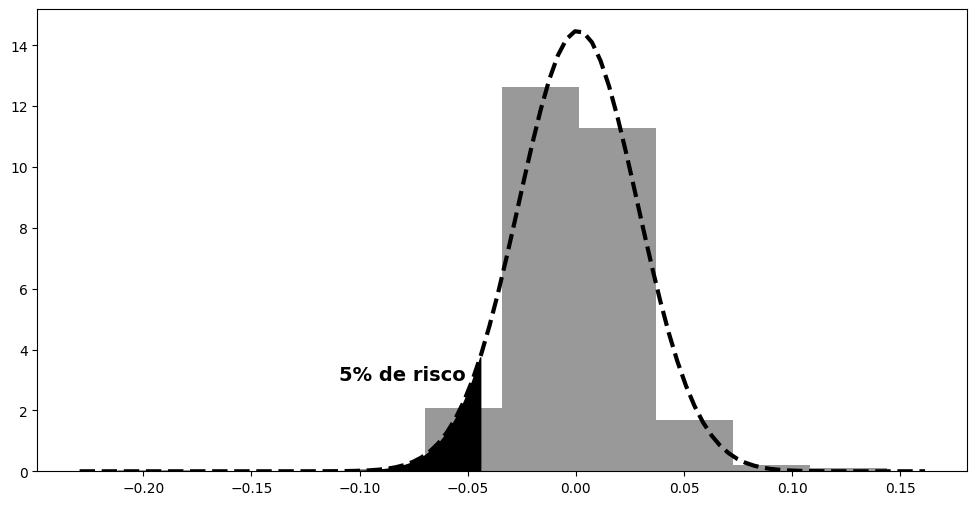

In [10]:
# Histograma e curva normal do ativo
# em vez de usar a função normed=True, use density=true
plt.figure(figsize=(12,6))
ax1 = plt.subplot(111)
ax1.hist(np.asarray(ri, dtype='float'),bins=10, density=True,color='black',alpha=0.4)

xmin,xmax = plt.xlim()
eixox = np.linspace(xmin,xmax,100)
eixoy = norm.pdf(eixox,mi,sigma)
ax1.plot(eixox,eixoy,'--k',linewidth=3)

#VaR e área abaixo da normal
z = norm.ppf(0.05)
VaR = float(mi+z*sigma)
Ix = np.linspace(xmin,VaR,100)
Iy = norm.pdf(Ix,mi,sigma)
ax1.fill_between(Ix,Iy,color='k')
ax1.text(xmin+0.12,3,'5% de risco', fontsize=14,weight='bold')

In [9]:
# VaR Monetário (R$)
dias = 1 # dias que deseja manter o ativo no futuro
VaR_Mon = VaR * float(prec[-1:].values)*mt.sqrt(dias)

print("VaR do ativo")
print("Dias na posição futura: ", dias)
print("Última posição: ", float(prec[-1:].values))
print("VaR (5%): ", str(round(100*VaR,3))+' %')
print("VaR Monetário por ação: ", round(VaR_Mon,3))

VaR do ativo
Dias na posição futura:  1
Última posição:  52.82
VaR (5%):  -4.423 %
VaR Monetário por ação:  -2.336


### 9.5 SIMULAÇÃO DE MONTE CARLO

3.1308


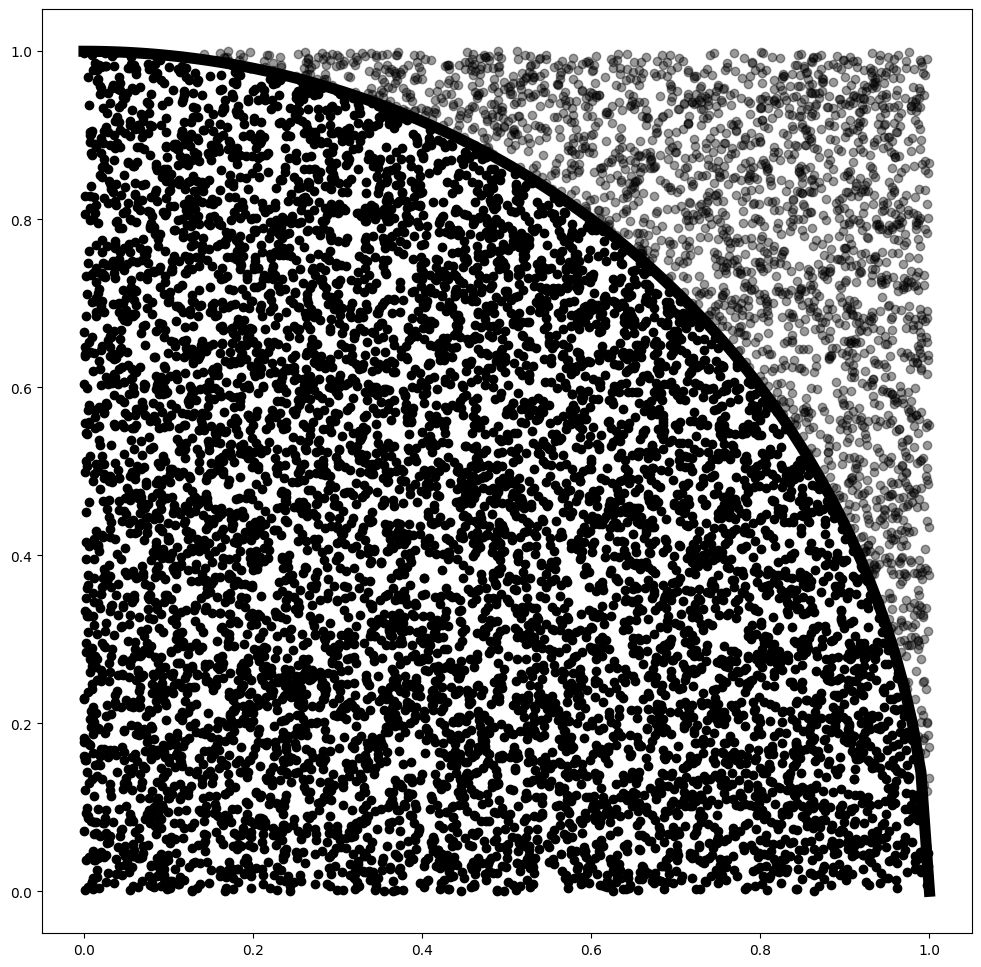

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
x = np.random.random([10000])
y = np.random.random([10000])
eix = np.linspace(0,1,100)
circ = np.sqrt(np.ones(100)-eix**2)
plt.plot(eix,circ,'-k',linewidth=8)

N=0
M=0

for i in range(10000):
    M = M+1
    if ((x[i]**2+y[i]**2)<1):
        N=N+1
        plt.plot(x[i],y[i],'ok')
    else:
        plt.plot(x[i],y[i],'ok',alpha=0.4)
        
pi = 4*N/M
print(pi)

### EXEMPLO 9.3

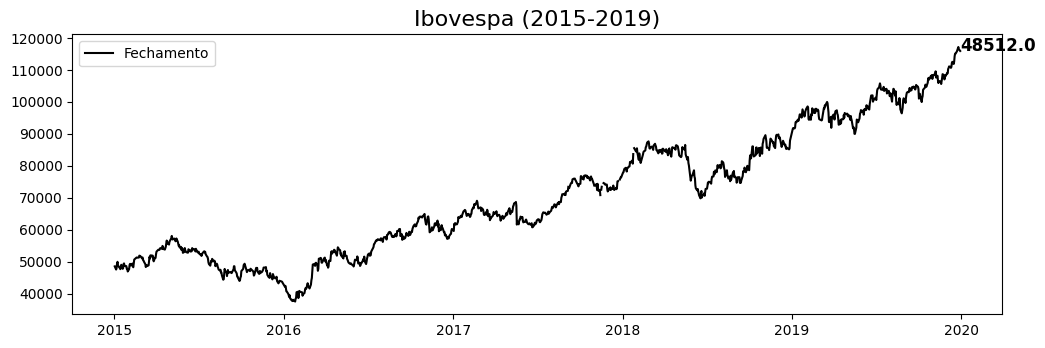

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

dados = pd.read_excel('dados/BVSP.xlsx',sheet_name = 'BVSP')
df = dados[['Date','Fechamento']]

list=['Fechamento']
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(df.Date,df.Fechamento,'-k',alpha=1)
plt.title('Ibovespa (2015-2019)',fontsize=16)
ax1.legend(list)

for i in range(1):
    ax1.text(x = df.Date[-1:],y = df.Fechamento[-1:],s=df.Fechamento[i],fontsize=12,color='k',weight='bold')
    
n=len(df)

In [23]:
#exclui coluna de datas para o cálculo do retorno
prec = df.drop(['Date'],axis=1)

Text(0, 0.5, 'Retornos')

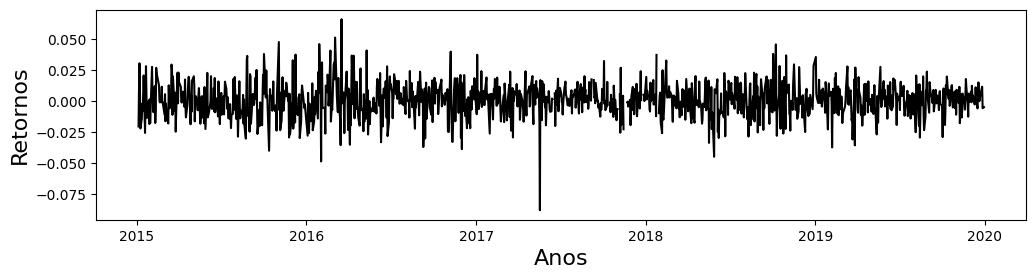

In [25]:
# retorno dos preços
plt.figure(figsize=(12,6))
ri = prec/prec.shift(1)-1
mi = ri.mean().values   #retorno médio dos ativos por colunas
sigma = ri.std()   # desvio padrão
ax1=plt.subplot(212)
ax1.plot(df.Date,ri,'-k',alpha=1)
plt.xlabel('Anos', fontsize=16)
plt.ylabel('Retornos',fontsize=16)

Text(0.5, 1.0, 'Histograma de retornos - Ibovespa (2015-2019)')

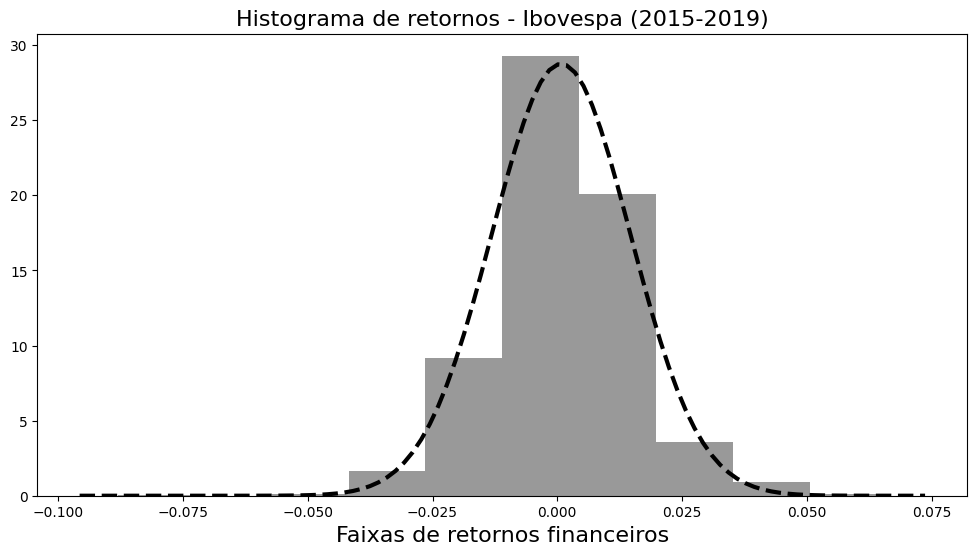

In [29]:
# Histograma e curva normal do ativo
plt.figure(figsize=(12,6))
ax1 = plt.subplot(111)
ax1.hist(np.asarray(ri,dtype='float'),bins=10,density=True,color='black', alpha=0.4)

xmin,xmax = plt.xlim()
eixox=np.linspace(xmin,xmax,100)
eixoy=norm.pdf(eixox,mi,sigma)
ax1.plot(eixox,eixoy,'--k',linewidth=3)
plt.xlabel('Faixas de retornos financeiros', fontsize=16)
plt.title('Histograma de retornos - Ibovespa (2015-2019)',fontsize=16)

Resultado da simulação de Monte Carlo
Retorno Médio Real:  0.1903087849033646
Retorno médio simulado:  0.2481474188289147
Volatilidade real:  3.496617591954617
Volatilidade simulada:  3.4715652090997033


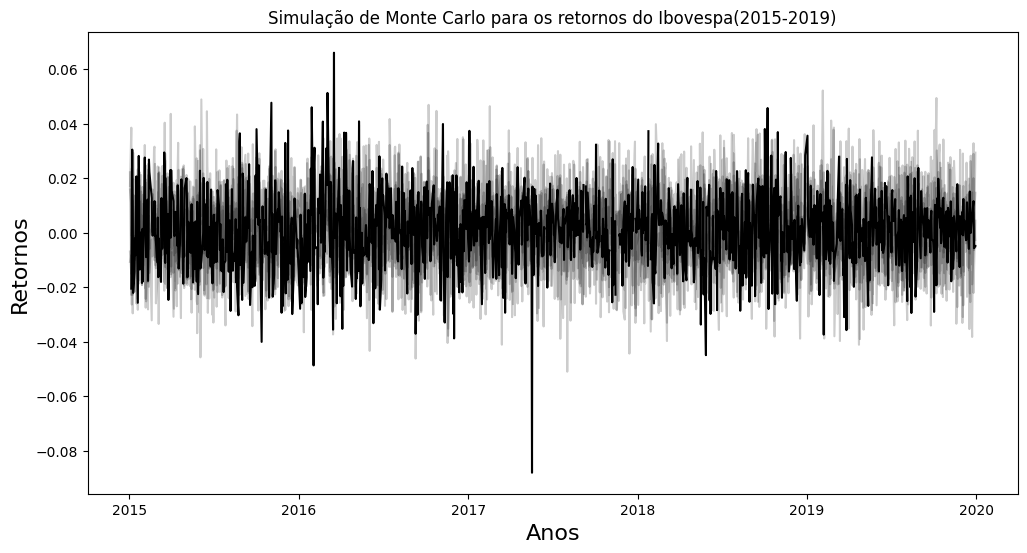

In [30]:
# simulação de Monte Carlo
x = np.zeros((n,5))
for j in range(5):
    for i in range(n):
        x[i,j] = np.random.normal(mi,sigma)
    
plt.figure(figsize=(12,6))
plt.plot(df.Date,ri,'-k')
plt.plot(df.Date,x,'-k',alpha=0.2)
plt.xlabel('Anos',fontsize=16)
plt.ylabel('Retornos',fontsize=16)
plt.title('Simulação de Monte Carlo para os retornos do Ibovespa(2015-2019)')

print('Resultado da simulação de Monte Carlo')
print('Retorno Médio Real: ',float(mi)*252)
print('Retorno médio simulado: ', x.mean()*252)
print('Volatilidade real: ', float(sigma)*252)
print('Volatilidade simulada: ', x.std()*252)

### EXEMPLO 9.4

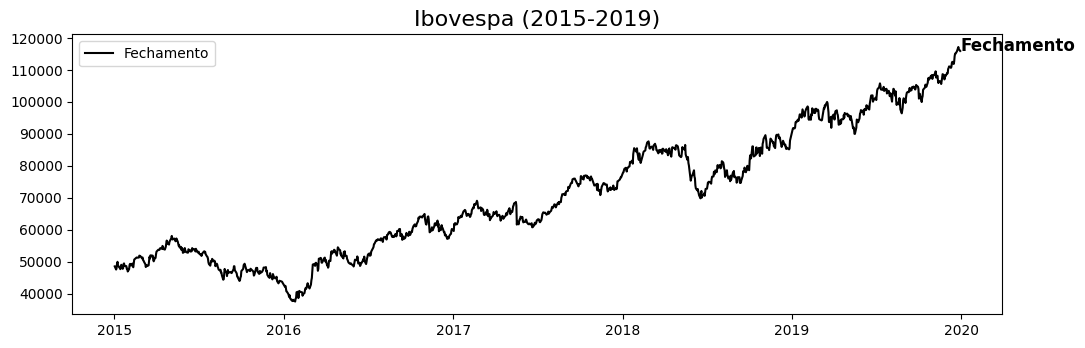

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as m
from scipy.stats import norm

dados = pd.read_excel('dados/BVSP.xlsx',sheet_name = 'BVSP')
df = dados[['Date','Fechamento']]

list=['Fechamento']
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(df.Date,df[list],'-k',alpha=1)
plt.title('Ibovespa (2015-2019)',fontsize=16)
ax1.legend(list)

for i in range(1):
    ax1.text(x = df.Date[-1:],y = df[list[i]][-1:],
             s=list[i],fontsize=12,color='k',weight='bold')
    
n=len(df)

Coeficiente de tendência linear y = b + ax
a =  52.189349890619944   b =  38422.095127920795


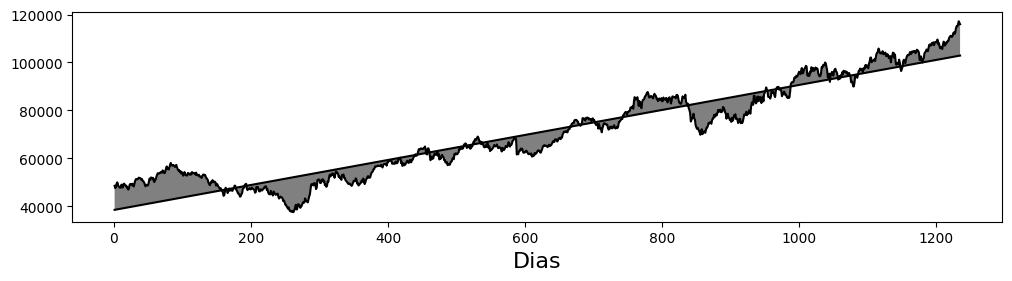

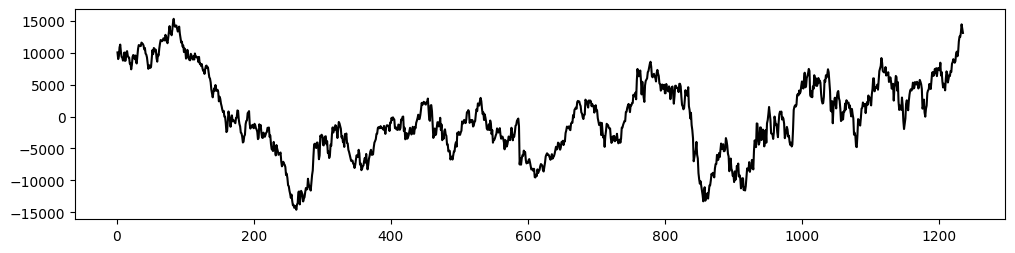

In [3]:
# exclui a coluna de dados para o cálculo de retorno
x = np.linspace(1,n,n)
coef = np.polyfit(x,df['Fechamento'],1)
tendencia = coef[1]+coef[0]*x

print("Coeficiente de tendência linear y = b + ax")
print("a = ",coef[0], "  b = ",coef[1])

plt.figure(figsize=(12,6))
ax1 = plt.subplot(212)
ax1.plot(x,df['Fechamento'],'-k',x,tendencia,'-k')
ax1.fill_between(x,df['Fechamento'],tendencia, facecolor='gray')
plt.xlabel('Dias',fontsize=16)

plt.figure(figsize=(12,6))
ax1=plt.subplot(211)
filtro = m.detrend_linear(df['Fechamento'])
mi = filtro.mean()
sigma = filtro.std()
ax1.plot(x,filtro,'-k')

Text(0.5, 0, 'Classes para a diferença entre tendência e Ibovespa')

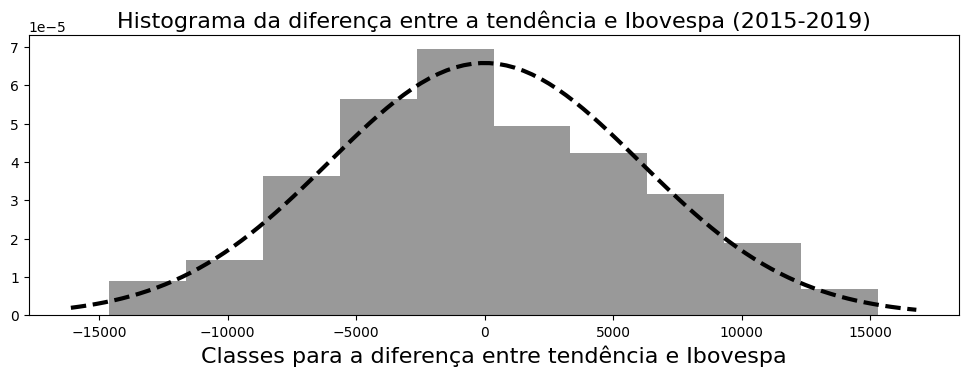

In [4]:
plt.figure(figsize=(12,8))
ax1=plt.subplot(212)
ax1.hist(np.asarray(filtro,dtype='float'),bins=10,density=True,color='black',alpha=0.4)
plt.title("Histograma da diferença entre a tendência e Ibovespa (2015-2019)",fontsize=16)
xmin,xmax=plt.xlim()
eixox = np.linspace(xmin,xmax,100)
eixoy = norm.pdf(eixox,mi,sigma)
ax1.plot(eixox,eixoy,'--k',linewidth=3)
plt.xlabel('Classes para a diferença entre tendência e Ibovespa',fontsize=16)

Text(0.5, 1.0, 'Simulação de Monte Carlo para o Ibovespa')

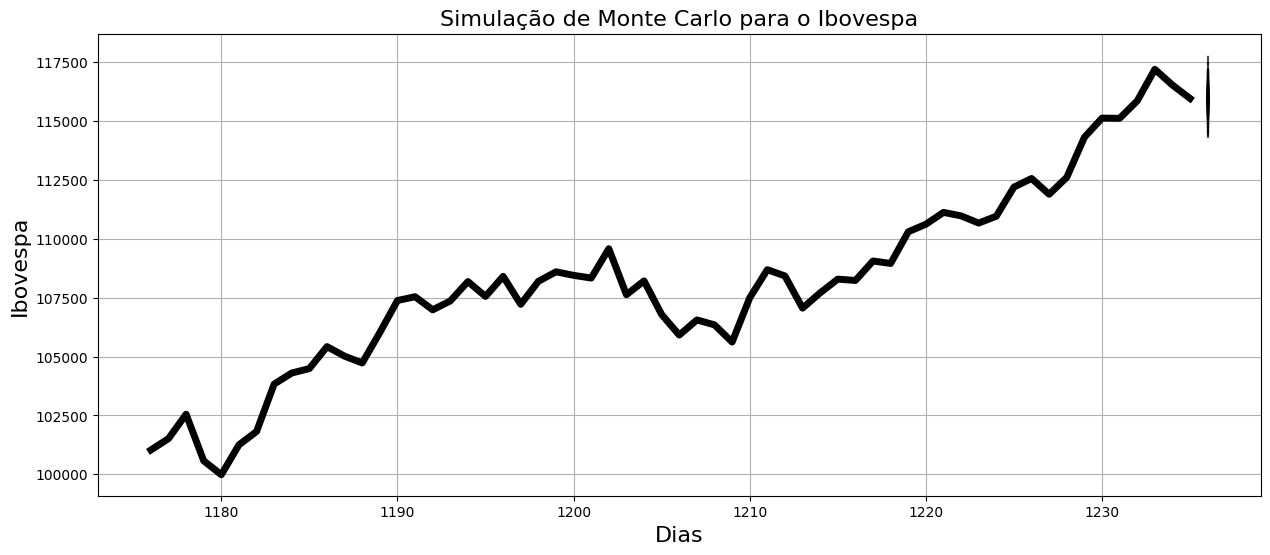

In [11]:
# simulação de Monte Carlo
num = 15
dias = 20

aleat = np.zeros((dias,num))
simul = np.zeros((dias,num))
eixo = np.zeros((dias,num))

for j in range(num):
    for i in range(dias):
        eixo[i,0] = n+1
        aleat[i,j] = np.random.normal(mi,sigma/np.sqrt(n))*np.sqrt(i)
        simul[i,j] = df['Fechamento'][-1:]+aleat[i,j]

plt.figure(figsize=(15,6))
plt.plot(x[-60:],df['Fechamento'][-60:], '-k',linewidth=5)
plt.plot(eixo[:,0],simul,'--k',alpha=0.7)
plt.xlabel("Dias",fontsize=16)
plt.ylabel("Ibovespa",fontsize=16)
plt.grid()
plt.title("Simulação de Monte Carlo para o Ibovespa",fontsize=16)

In [6]:
print("Média real(detrends) : ",float(mi))
print("Média da Simulação : ",simul.mean())
print("Volatilidade real (desvio padrão dos detrends passados) : ",float(sigma))
print("Volatilidade da simulação (desvio padrão dos detrends futuros) : ",simul.std())

Média real(detrends) :  -1.1311610218001764e-12
Média da Simulação :  115957.48729381833
Volatilidade real (desvio padrão dos detrends passados) :  6059.670106874547
Volatilidade da simulação (desvio padrão dos detrends futuros) :  503.79094504881556


### 9.6 SIMULAÇÃO ESTOCÁSTICA

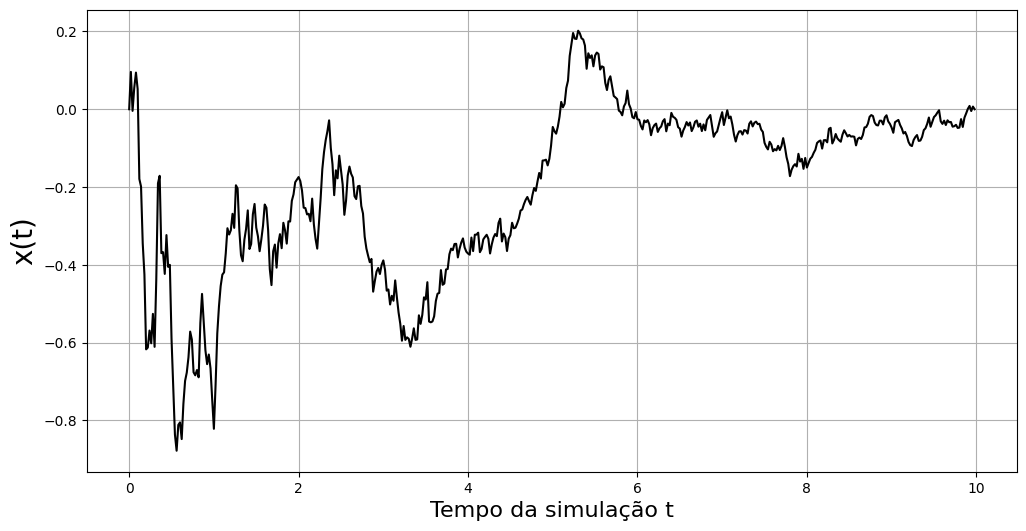

In [14]:
# Modelo 1
# dx = -x/(1+t) dt + 1/(1+t) dw

import numpy as np
import matplotlib.pyplot as plt

# condições iniciais do modelo

T = 10                   # tempo final
N = 500                  # número de pontos
dt = T/N                 # passo da simulação
t = np.arange(0,T,dt)    # vetor tempo para o modelo
Xzero = 0                # condição inicial

# geração dos deltas estocasticos

dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)

R = 1
Dt = R * dt              # delta de integração do tempo
L = int(N/R)
Xem = np.zeros(L)        # inicialização do vetor solução
Xtemp = Xzero

# resolução numérica do modelo estocástico
for j in range(1,L-1):
    Winc = np.cumsum(dW[R*(j-1) : R*j])
    Xtemp = Xtemp + (-1/(1+t[j]))*Xtemp*Dt+(1/(1+t[j]))*Winc
    Xem[j] = Xtemp
    
# gráfico da solução
plt.figure(figsize=(12,6))
plt.plot(t, Xem,'-k')
plt.xlabel('Tempo da simulação t', fontsize = 16)
plt.ylabel("x(t)",fontsize = 20)
plt.grid()

/tmp/ipykernel_1110/1910319272.py:29: RuntimeWarning: invalid value encountered in sqrt
  Xtemp = Xtemp+0.25*(1-np.sqrt(Xtemp))*Dt+np.sqrt(Xtemp)*Winc # Modelo estocástico


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

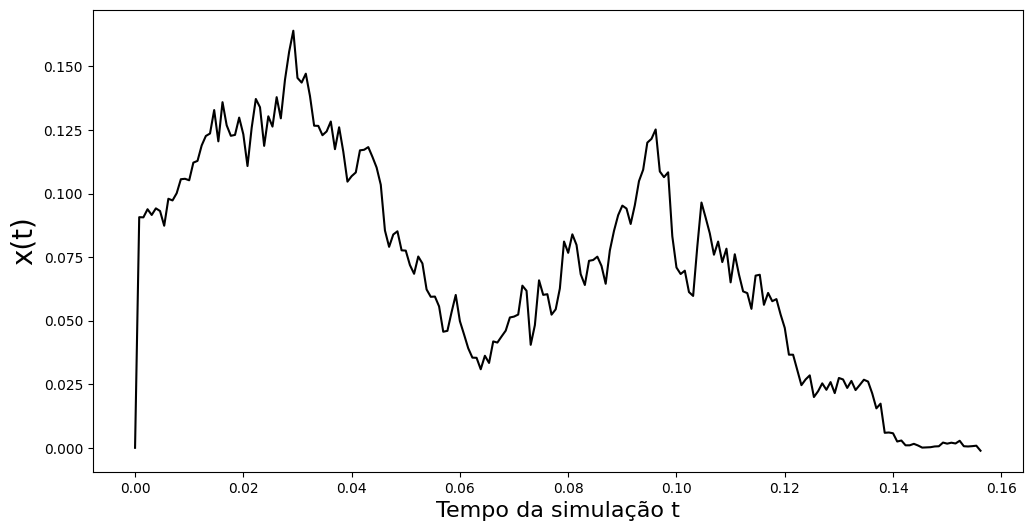

In [3]:
# Modelo 2
# dx = (1-sqrt(x))/4 + sqrt(x) dw

import numpy as np
import matplotlib.pyplot as plt

# condições iniciais do modelo

T = 1                    # tempo final
N = 1300                  # número de pontos
dt = T/N                 # passo da simulação
t = np.arange(0,T,dt)    # vetor tempo para o modelo

Xzero = 0.1              # condição inicial

# geração dos deltas estocáticos
dW = np.sqrt(dt) * np.random.randn(N)
W = np.cumsum(dW)

R = 1
Dt = R*dt                # delta da integração no tempo
L = int(N/R)
Xem = np.zeros(L)
Xtemp = Xzero

# resolução numérica do modelo estocástico
for j in range(1, L):
    Winc = np.sum(dW[R*(j-1):R*j])
    Xtemp = Xtemp+0.25*(1-np.sqrt(Xtemp))*Dt+np.sqrt(Xtemp)*Winc # Modelo estocástico
    Xem[j] = Xtemp
    
# gráfico da solução
plt.figure(figsize=(12,6))
plt.plot(t,Xem,'-k')
plt.xlabel('Tempo da simulação t',fontsize = 16)
plt.ylabel('x(t)',fontsize = 20)
plt.grid

Text(0.5, 1.0, 'CRASH 2008 - Ibovespa x Simulação Estocástica')

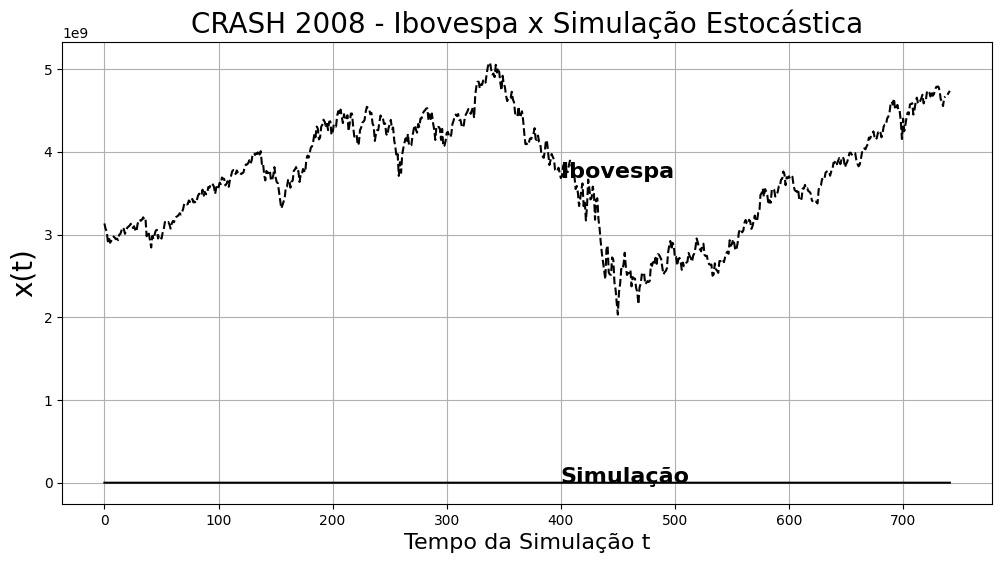

In [7]:
# Modelo 3 (Ibovespa 2008)
# dx = theta1*(1-sqrt(x)) dt + theta2*sqrt(x) dw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("dados/IBOV_2007_2008_2009.xlsx", sheet_name="IBOV_2007_2008_2009", usecols=[0,4])

# condições iniciais do modelo
T = len(df['FECHAMENTO'])     #tempo final
N = len(df['FECHAMENTO'])     # nº de pont
dt=T/N                        # passo de simulação
t = np.arange(0,T,dt)         # vetor tempo para o modelo

Xzero = 0.48                  # condição inicial
u1 = 0.0068
u2 = 0.0192

# geração dos deltas estocasticos
np.random.seed(2)
dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)

R = 1
Dt = R*dt                     # delta de integração no tempo
L = int(N/R)
Xem = np.zeros(L)
Xtemp = Xzero

# resolução numérica do modelo estocástico

for j in range(L):
    Winc = np.sum(dW[R*(j-1):R*j])
    Xtemp = Xtemp + u1*(1-np.sqrt(Xtemp))*Dt+u2*np.sqrt(Xtemp)*Winc # Modelo estocástico
    Xem[j]=Xtemp
# gráfico da solução
plt.figure(figsize=(12,6))
ax1 = plt.subplot(111)
ax1.plot(t, Xem*69052,'-k',t,df['FECHAMENTO']*69052,'--k')
ax1.text(x=t[400],y=Xem[400]*69052,s='Simulação',fontsize=16,color='k',weight='bold')
ax1.text(x=t[400],y=df['FECHAMENTO'][400]*69052,s='Ibovespa',fontsize=16,color='k',weight='bold')
ax1.set_xlabel('Tempo da Simulação t',fontsize=16)
ax1.set_ylabel('x(t)', fontsize=20)
plt.grid()
plt.title('CRASH 2008 - Ibovespa x Simulação Estocástica',fontsize=20)